In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from imblearn.over_sampling import SMOTE


In [34]:
data = pd.read_csv('Heart Disease.csv')

data.fillna(data.mean(), inplace=True)

if data.isna().sum().sum() == 0:
    print("No NaN values remain.")
else:
    print("There are still NaN values in the dataset.")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

def split_data(X, y, train_size=0.7, val_size=0.15):
    # Calculate the number of samples
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    train_end = int(train_size * num_samples)
    val_end = train_end + int(val_size * num_samples)
    
    train_indices = indices[:train_end]
    val_indices = indices[train_end:val_end]
    test_indices = indices[val_end:]
    
    X_train, y_train = X[train_indices], y[train_indices]
    X_val, y_val = X[val_indices], y[val_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train_copy = X_train.copy()
y_train_copy = y_train.copy()
X_val_copy = X_val.copy()
y_val_copy = y_val.copy()
X_test_copy = X_test.copy()
y_test_copy = y_test.copy()

X_train_copy = (X_train_copy - np.mean(X_train_copy, axis=0)) / np.std(X_train_copy, axis=0)
X_val_copy = (X_val_copy - np.mean(X_val_copy, axis=0)) / np.std(X_val_copy, axis=0)
X_test_copy = (X_test_copy - np.mean(X_test_copy, axis=0)) / np.std(X_test_copy, axis=0)


No NaN values remain.


In [35]:
def predict_logistic_regression(X, W, b):
    z = np.dot(X, W) + b
    y_hat = sigmoid(z)
    return (y_hat >= 0.5).astype(int)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat):
    m = len(y)
    return -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def compute_accuracy(y, y_hat):
    predictions = y_hat >= 0.5
    return np.mean(predictions == y)

def train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.0001, iterations=10000):
    m, n = X_train.shape
    W = np.zeros(n)
    b = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [],[]

    for i in range(iterations):
        # Forward pass (Train)
        z_train = np.dot(X_train, W) + b
        y_hat_train = sigmoid(z_train)
        
        # Compute loss 
        train_loss = compute_loss(y_train, y_hat_train)
        train_acc = compute_accuracy(y_train, y_hat_train)
        
        # Forward pass (Validation)
        z_val = np.dot(X_val, W) + b
        y_hat_val = sigmoid(z_val)
        
        # Compute loss 
        val_loss = compute_loss(y_val, y_hat_val)
        val_acc = compute_accuracy(y_val, y_hat_val)
        
        # Gradient computation
        dW = (1/m) * np.dot(X_train.T, (y_hat_train - y_train))
        db = (1/m) * np.sum(y_hat_train - y_train)
        
        # Update weights and bias
        W -= learning_rate * dW
        b -= learning_rate * db
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

    return W, b, train_losses, val_losses, train_accuracies, val_accuracies



Iteration 0: Train Loss = 0.6931, Val Loss = 0.6931, Train Acc = 0.5000, Val Acc = 0.1449
Iteration 100: Train Loss = 0.6922, Val Loss = 0.6927, Train Acc = 0.6356, Val Acc = 0.6252
Iteration 200: Train Loss = 0.6913, Val Loss = 0.6922, Train Acc = 0.6358, Val Acc = 0.6252
Iteration 300: Train Loss = 0.6905, Val Loss = 0.6917, Train Acc = 0.6360, Val Acc = 0.6252
Iteration 400: Train Loss = 0.6896, Val Loss = 0.6913, Train Acc = 0.6362, Val Acc = 0.6252
Iteration 500: Train Loss = 0.6887, Val Loss = 0.6908, Train Acc = 0.6358, Val Acc = 0.6252
Iteration 600: Train Loss = 0.6879, Val Loss = 0.6904, Train Acc = 0.6358, Val Acc = 0.6252
Iteration 700: Train Loss = 0.6871, Val Loss = 0.6900, Train Acc = 0.6364, Val Acc = 0.6252
Iteration 800: Train Loss = 0.6862, Val Loss = 0.6895, Train Acc = 0.6362, Val Acc = 0.6252
Iteration 900: Train Loss = 0.6854, Val Loss = 0.6891, Train Acc = 0.6366, Val Acc = 0.6252
Iteration 1000: Train Loss = 0.6846, Val Loss = 0.6887, Train Acc = 0.6362, Val Ac

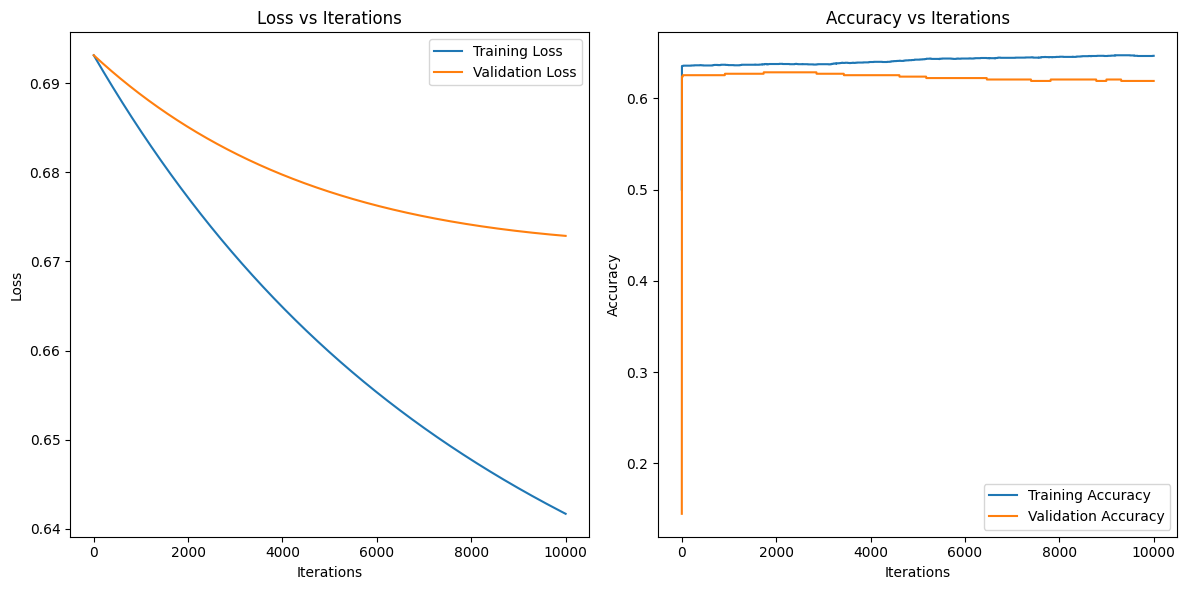

In [36]:
# Normalize the data (feature scaling)
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_val = (X_val - np.mean(X_val, axis=0)) / np.std(X_val, axis=0)

W, b, train_losses, val_losses, train_accuracies, val_accuracies = train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.0001, iterations=10000)

iterations = range(1, 10001)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(iterations, train_losses, label='Training Loss')
plt.plot(iterations, val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(iterations, train_accuracies, label='Training Accuracy')
plt.plot(iterations, val_accuracies, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

c) doing min max scaling

In [37]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Iteration 0: Train Loss = 0.6931, Val Loss = 0.6931, Train Acc = 0.5000, Val Acc = 0.1449
Iteration 100: Train Loss = 0.6880, Val Loss = 0.7075, Train Acc = 0.5250, Val Acc = 0.1449
Iteration 200: Train Loss = 0.6841, Val Loss = 0.7142, Train Acc = 0.5857, Val Acc = 0.2173
Iteration 300: Train Loss = 0.6806, Val Loss = 0.7169, Train Acc = 0.6089, Val Acc = 0.3102
Iteration 400: Train Loss = 0.6775, Val Loss = 0.7173, Train Acc = 0.6223, Val Acc = 0.3748
Iteration 500: Train Loss = 0.6747, Val Loss = 0.7168, Train Acc = 0.6466, Val Acc = 0.4283
Iteration 600: Train Loss = 0.6721, Val Loss = 0.7157, Train Acc = 0.6550, Val Acc = 0.4567
Iteration 700: Train Loss = 0.6696, Val Loss = 0.7145, Train Acc = 0.6632, Val Acc = 0.4882
Iteration 800: Train Loss = 0.6674, Val Loss = 0.7132, Train Acc = 0.6626, Val Acc = 0.5134
Iteration 900: Train Loss = 0.6653, Val Loss = 0.7119, Train Acc = 0.6634, Val Acc = 0.5354
Iteration 1000: Train Loss = 0.6634, Val Loss = 0.7107, Train Acc = 0.6628, Val Ac

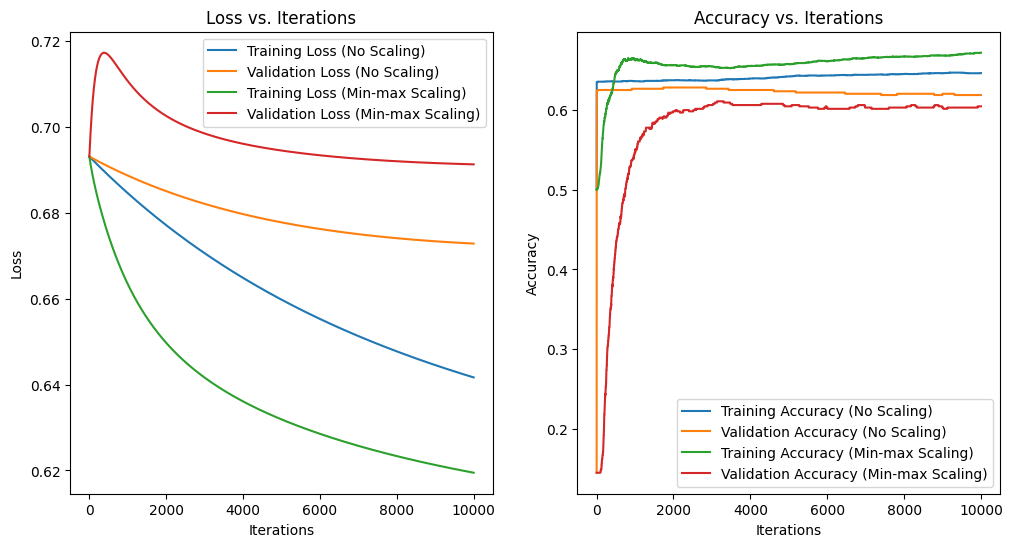

In [38]:
w_ns, b_ns, train_losses_ns, val_losses_ns, train_accs_ns, val_accs_ns =W, b, train_losses, val_losses, train_accuracies, val_accuracies

w_mm, b_mm, train_losses_mm, val_losses_mm, train_accs_mm, val_accs_mm = train_logistic_regression(X_train_scaled, y_train, X_val_scaled, y_val, learning_rate=0.01, iterations=10000)

iterations = range(1, 10001)

plt.figure(figsize=(12, 6))

# Subplot 1: Loss vs Iterations
plt.subplot(1, 2, 1)
plt.plot(iterations, train_losses_ns, label='Training Loss (No Scaling)')
plt.plot(iterations, val_losses_ns, label='Validation Loss (No Scaling)')
plt.plot(iterations, train_losses_mm, label='Training Loss (Min-max Scaling)')
plt.plot(iterations, val_losses_mm, label='Validation Loss (Min-max Scaling)')
plt.legend()
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Subplot 2: Accuracy vs Iterations
plt.subplot(1, 2, 2)
plt.plot(iterations, train_accs_ns, label='Training Accuracy (No Scaling)')
plt.plot(iterations, val_accs_ns, label='Validation Accuracy (No Scaling)')
plt.plot(iterations, train_accs_mm, label='Training Accuracy (Min-max Scaling)')
plt.plot(iterations, val_accs_mm, label='Validation Accuracy (Min-max Scaling)')
plt.legend()
plt.title("Accuracy vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()


c) Report precision, recall, F1 score, and ROC-AUC score for the model based on the

validation set.

In [39]:
y_val_pred_ns = predict_logistic_regression(X_val, w_ns, b_ns)
y_val_pred_mm = predict_logistic_regression(X_val_scaled, w_mm, b_mm)

# Compute metrics for the model without scaling
conf_matrix_ns = confusion_matrix(y_val, y_val_pred_ns)
precision_ns = precision_score(y_val, y_val_pred_ns)
recall_ns = recall_score(y_val, y_val_pred_ns)
f1_ns = f1_score(y_val, y_val_pred_ns)
roc_auc_ns = roc_auc_score(y_val, y_val_pred_ns)

# Compute metrics for the model with Min-Max Scaling
conf_matrix_mm = confusion_matrix(y_val, y_val_pred_mm)
precision_mm = precision_score(y_val, y_val_pred_mm)
recall_mm = recall_score(y_val, y_val_pred_mm)
f1_mm = f1_score(y_val, y_val_pred_mm)
roc_auc_mm = roc_auc_score(y_val, y_val_pred_mm)

print("Metrics for model without scaling:")
print("Confusion Matrix:\n", conf_matrix_ns)
print("Precision:", precision_ns)
print("Recall:", recall_ns)
print("F1 Score:", f1_ns)
print("ROC-AUC Score:", roc_auc_ns)

print("\nMetrics for model with Min-Max Scaling:")
print("Confusion Matrix:\n", conf_matrix_mm)
print("Precision:", precision_mm)
print("Recall:", recall_mm)
print("F1 Score:", f1_mm)
print("ROC-AUC Score:", roc_auc_mm)

Metrics for model without scaling:
Confusion Matrix:
 [[329 214]
 [ 28  64]]
Precision: 0.2302158273381295
Recall: 0.6956521739130435
F1 Score: 0.34594594594594597
ROC-AUC Score: 0.6507726799583633

Metrics for model with Min-Max Scaling:
Confusion Matrix:
 [[317 226]
 [ 25  67]]
Precision: 0.22866894197952217
Recall: 0.7282608695652174
F1 Score: 0.34805194805194806
ROC-AUC Score: 0.6560273040275442


d) doing the Stochastic Gradient Descent and Mini-Batch Gradient Descent


In [40]:
def train_mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size=32, learning_rate=0.0001, iterations=10000):
    m, n = X_train.shape
    W = np.zeros(n)
    b = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for i in range(iterations):
        indices = np.arange(m)
        np.random.shuffle(indices)
        
        for start_idx in range(0, m, batch_size):
            end_idx = min(start_idx + batch_size, m)
            batch_indices = indices[start_idx:end_idx]
            X_batch = X_train[batch_indices]
            y_batch = y_train[batch_indices]
            
            # Forward pass (Train)
            z_train = np.dot(X_batch, W) + b
            y_hat_train = sigmoid(z_train)
            
            # Gradient computation
            dW = (1/batch_size) * np.dot(X_batch.T, (y_hat_train - y_batch))
            db = (1/batch_size) * np.sum(y_hat_train - y_batch)
            
            # Update weights and bias
            W -= learning_rate * dW
            b -= learning_rate * db
        
        # Compute loss 
        y_hat_train = sigmoid(np.dot(X_train, W) + b)
        train_loss = compute_loss(y_train, y_hat_train)
        train_acc = compute_accuracy(y_train, y_hat_train)
        
        # Forward pass (Validation)
        y_hat_val = sigmoid(np.dot(X_val, W) + b)
        val_loss = compute_loss(y_val, y_hat_val)
        val_acc = compute_accuracy(y_val, y_hat_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        if i % 100 == 0:
            print(f"Mini-Batch Gradient Descent (Batch Size {batch_size}) - Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

    return W, b, train_losses, val_losses, train_accuracies, val_accuracies


In [41]:
def train_stochastic_gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.0001, iterations=10000):
    m, n = X_train.shape
    W = np.zeros(n)
    b = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for i in range(iterations):
        for j in range(m):
            idx = np.random.randint(m)
            X_batch = X_train[idx:idx+1]
            y_batch = y_train[idx:idx+1]
            
            # Forward pass (Train)
            z_train = np.dot(X_batch, W) + b
            y_hat_train = sigmoid(z_train)
            
            # Gradient computation
            dW = (1/1) * np.dot(X_batch.T, (y_hat_train - y_batch))
            db = (1/1) * np.sum(y_hat_train - y_batch)
            
            # Update weights and bias
            W -= learning_rate * dW
            b -= learning_rate * db
        
        # Compute loss 
        y_hat_train = sigmoid(np.dot(X_train, W) + b)
        train_loss = compute_loss(y_train, y_hat_train)
        train_acc = compute_accuracy(y_train, y_hat_train)
        
        # Forward pass (Validation)
        y_hat_val = sigmoid(np.dot(X_val, W) + b)
        val_loss = compute_loss(y_val, y_hat_val)
        val_acc = compute_accuracy(y_val, y_hat_val)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if i % 100 == 0:
            print(f"Stochastic Gradient Descent - Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")

    return W, b, train_losses, val_losses, train_accuracies, val_accuracies


Mini-Batch Gradient Descent (Batch Size 33) - Iteration 0: Train Loss = 0.6859, Val Loss = 0.7113, Train Acc = 0.5685, Val Acc = 0.1669
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 100: Train Loss = 0.6129, Val Loss = 0.6901, Train Acc = 0.6784, Val Acc = 0.6173
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 200: Train Loss = 0.6060, Val Loss = 0.6951, Train Acc = 0.6824, Val Acc = 0.5906
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 300: Train Loss = 0.6038, Val Loss = 0.6957, Train Acc = 0.6846, Val Acc = 0.5921
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 400: Train Loss = 0.6028, Val Loss = 0.6976, Train Acc = 0.6858, Val Acc = 0.5921
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 500: Train Loss = 0.6022, Val Loss = 0.6962, Train Acc = 0.6848, Val Acc = 0.5921
Mini-Batch Gradient Descent (Batch Size 33) - Iteration 600: Train Loss = 0.6018, Val Loss = 0.6966, Train Acc = 0.6846, Val Acc = 0.5937
Mini-Batch Gradient Descent (Batch S

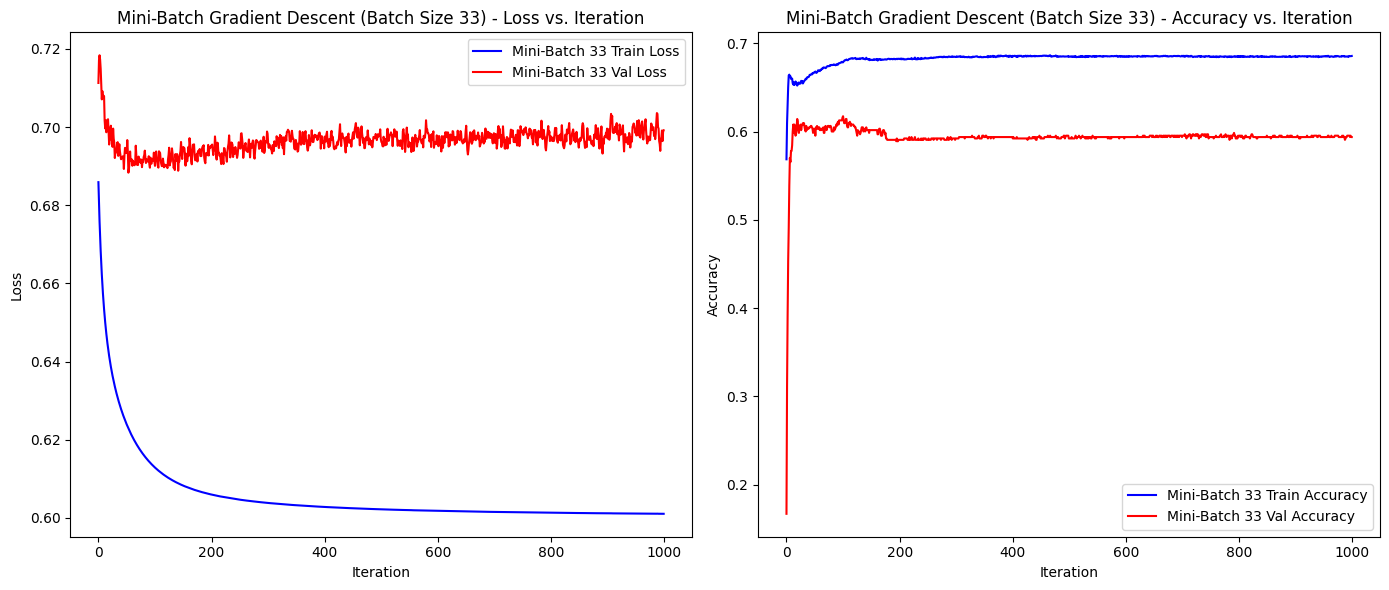

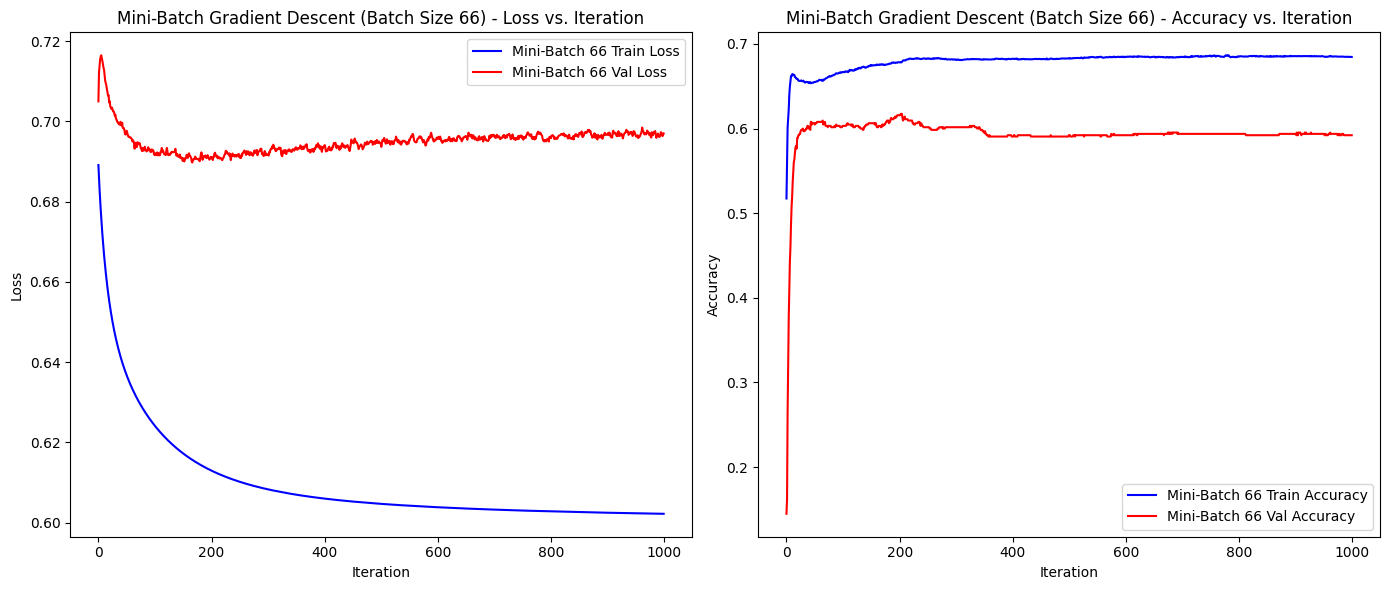

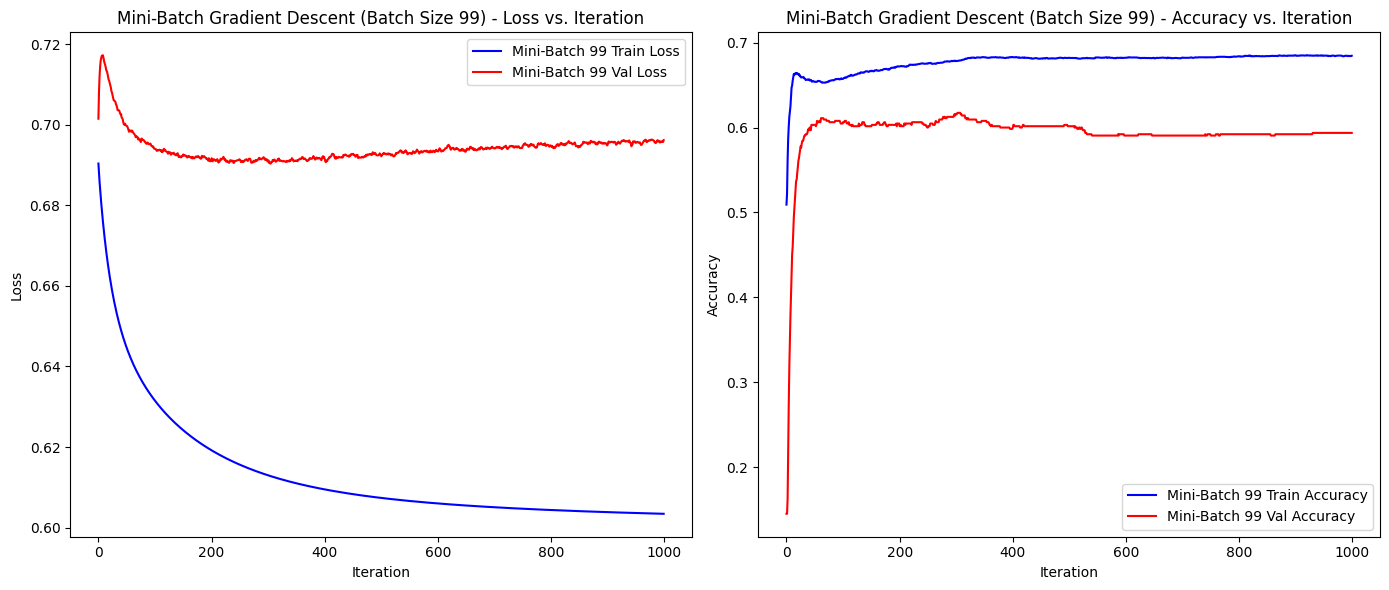

In [42]:
learning_rate = 0.01
iterations = 1000
batch_sizes = [33,66,99] 

results_mini_batch = {}
for batch_size in batch_sizes:
    W_mini_batch, b_mini_batch, train_losses_mini_batch, val_losses_mini_batch, train_accuracies_mini_batch, val_accuracies_mini_batch = train_mini_batch_gradient_descent(
        X_train_scaled, y_train, X_val_scaled, y_val,
        batch_size=batch_size,
        learning_rate=learning_rate,
        iterations=iterations
    )
    results_mini_batch[batch_size] = {
        'train_losses': train_losses_mini_batch,
        'val_losses': val_losses_mini_batch,
        'train_accuracies': train_accuracies_mini_batch,
        'val_accuracies': val_accuracies_mini_batch
    }

for batch_size in batch_sizes:
    plt.figure(figsize=(14, 6))
    
    # Plot Losses for Mini-Batch Gradient Descent
    plt.subplot(1, 2, 1)
    plt.plot(results_mini_batch[batch_size]['train_losses'], label=f'Mini-Batch {batch_size} Train Loss', color='blue')
    plt.plot(results_mini_batch[batch_size]['val_losses'], label=f'Mini-Batch {batch_size} Val Loss', color='red')
    plt.title(f'Mini-Batch Gradient Descent (Batch Size {batch_size}) - Loss vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracies for Mini-Batch Gradient Descent
    plt.subplot(1, 2, 2)
    plt.plot(results_mini_batch[batch_size]['train_accuracies'], label=f'Mini-Batch {batch_size} Train Accuracy', color='blue')
    plt.plot(results_mini_batch[batch_size]['val_accuracies'], label=f'Mini-Batch {batch_size} Val Accuracy', color='red')
    plt.title(f'Mini-Batch Gradient Descent (Batch Size {batch_size}) - Accuracy vs. Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


Stochastic Gradient Descent - Iteration 0: Train Loss = 0.6746, Val Loss = 0.7361, Train Acc = 0.6091, Val Acc = 0.2992
Stochastic Gradient Descent - Iteration 100: Train Loss = 0.6039, Val Loss = 0.7211, Train Acc = 0.6848, Val Acc = 0.5843
Stochastic Gradient Descent - Iteration 200: Train Loss = 0.6017, Val Loss = 0.6889, Train Acc = 0.6844, Val Acc = 0.6016
Stochastic Gradient Descent - Iteration 300: Train Loss = 0.6014, Val Loss = 0.7189, Train Acc = 0.6854, Val Acc = 0.5780
Stochastic Gradient Descent - Iteration 400: Train Loss = 0.6009, Val Loss = 0.7042, Train Acc = 0.6868, Val Acc = 0.5906
Stochastic Gradient Descent - Iteration 500: Train Loss = 0.6010, Val Loss = 0.7184, Train Acc = 0.6866, Val Acc = 0.5732
Stochastic Gradient Descent - Iteration 600: Train Loss = 0.6006, Val Loss = 0.7034, Train Acc = 0.6856, Val Acc = 0.5811
Stochastic Gradient Descent - Iteration 700: Train Loss = 0.6005, Val Loss = 0.7020, Train Acc = 0.6854, Val Acc = 0.5874
Stochastic Gradient Descen

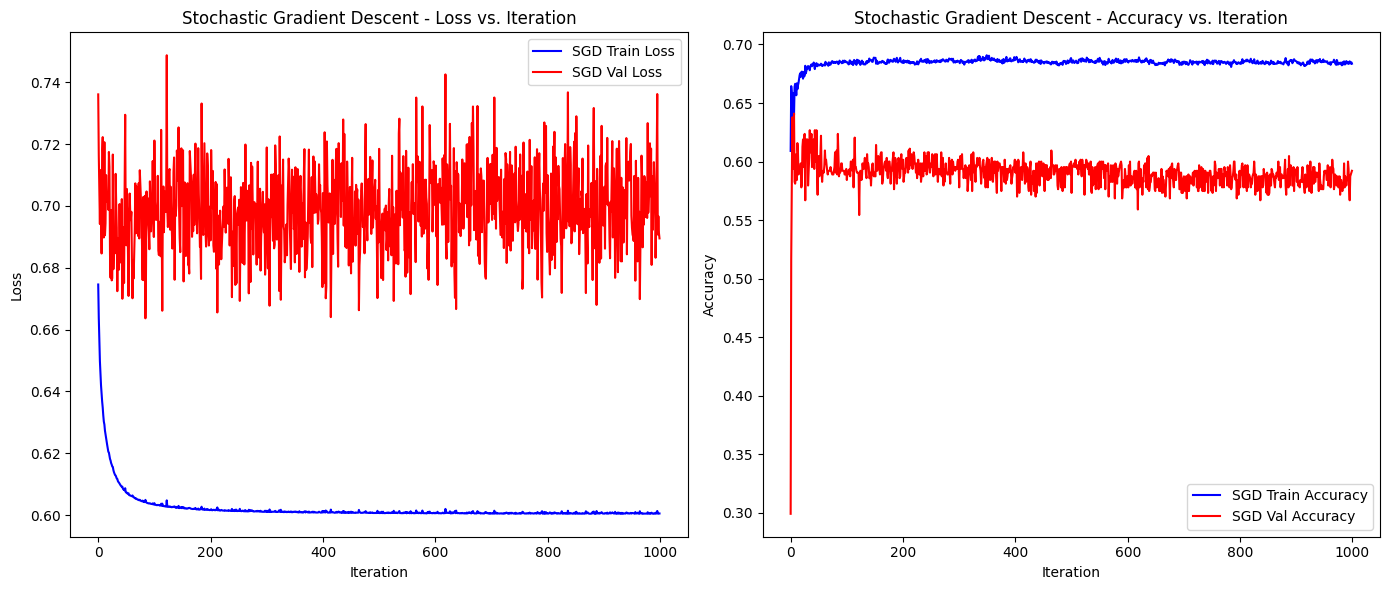

In [43]:
learning_rate = 0.001
iterations = 1000

W_sgd, b_sgd, train_losses_sgd, val_losses_sgd, train_accuracies_sgd, val_accuracies_sgd = train_stochastic_gradient_descent(
    X_train_scaled, y_train, X_val_scaled, y_val,
    learning_rate=learning_rate,
    iterations=iterations
)

plt.figure(figsize=(14, 6))

# Plot Losses for Stochastic Gradient Descent
plt.subplot(1, 2, 1)
plt.plot(train_losses_sgd, label='SGD Train Loss', color='blue')
plt.plot(val_losses_sgd, label='SGD Val Loss', color='red')
plt.title('Stochastic Gradient Descent - Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracies for Stochastic Gradient Descent
plt.subplot(1, 2, 2)
plt.plot(train_accuracies_sgd, label='SGD Train Accuracy', color='blue')
plt.plot(val_accuracies_sgd, label='SGD Val Accuracy', color='red')
plt.title('Stochastic Gradient Descent - Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


e)k-fold cross-validation (with k=5)


In [44]:
def k_fold_cross_validation(X, y, k=5, learning_rate=0.0001, iterations=10000):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        W, b, tmp, tmp2, tmp3, tmp4 = train_logistic_regression(X_train, y_train, X_val, y_val, learning_rate, iterations)
        
        y_hat_val = predict_logistic_regression(X_val, W, b)
        
        acc = compute_accuracy(y_val, y_hat_val)
        prec = precision_score(y_val, y_hat_val)
        rec = recall_score(y_val, y_hat_val)
        f1 = f1_score(y_val, y_hat_val)
        
        accuracies.append(acc)
        precisions.append(prec)
        recalls.append(rec)
        f1_scores.append(f1)
    
    avg_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)
    avg_prec = np.mean(precisions)
    std_prec = np.std(precisions)
    avg_rec = np.mean(recalls)
    std_rec = np.std(recalls)
    avg_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    
    return avg_acc, std_acc, avg_prec, std_prec, avg_rec, std_rec, avg_f1, std_f1


the average and standard deviation for accuracy, precision,
recall, and F1 score across the folds.

In [45]:
X = X_train_scaled  
y = y_train         

avg_acc, std_acc, avg_prec, std_prec, avg_rec, std_rec, avg_f1, std_f1 = k_fold_cross_validation(
    X, y, k=5, learning_rate=0.0001, iterations=10000
)

print(f"Accuracy: Mean = {avg_acc:.4f}, Std Dev = {std_acc:.4f}")
print(f"Precision: Mean = {avg_prec:.4f}, Std Dev = {std_prec:.4f}")
print(f"Recall: Mean = {avg_rec:.4f}, Std Dev = {std_rec:.4f}")
print(f"F1 Score: Mean = {avg_f1:.4f}, Std Dev = {std_f1:.4f}")


Iteration 0: Train Loss = 0.6931, Val Loss = 0.6931, Train Acc = 0.4988, Val Acc = 0.5050
Iteration 100: Train Loss = 0.6931, Val Loss = 0.6931, Train Acc = 0.4998, Val Acc = 0.5050
Iteration 200: Train Loss = 0.6930, Val Loss = 0.6930, Train Acc = 0.4998, Val Acc = 0.5050
Iteration 300: Train Loss = 0.6930, Val Loss = 0.6930, Train Acc = 0.4998, Val Acc = 0.5050
Iteration 400: Train Loss = 0.6929, Val Loss = 0.6929, Train Acc = 0.4998, Val Acc = 0.5050
Iteration 500: Train Loss = 0.6929, Val Loss = 0.6928, Train Acc = 0.5000, Val Acc = 0.5050
Iteration 600: Train Loss = 0.6928, Val Loss = 0.6928, Train Acc = 0.5002, Val Acc = 0.5050
Iteration 700: Train Loss = 0.6927, Val Loss = 0.6927, Train Acc = 0.5002, Val Acc = 0.5050
Iteration 800: Train Loss = 0.6927, Val Loss = 0.6926, Train Acc = 0.5005, Val Acc = 0.5050
Iteration 900: Train Loss = 0.6926, Val Loss = 0.6926, Train Acc = 0.5007, Val Acc = 0.5050
Iteration 1000: Train Loss = 0.6926, Val Loss = 0.6925, Train Acc = 0.5007, Val Ac

f)early stopping

In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_hat, W, l1_reg=0.0, l2_reg=0.0):
    m = len(y)
    loss = -(1/m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    if l1_reg > 0:
        loss += l1_reg * np.sum(np.abs(W))
    if l2_reg > 0:
        loss += l2_reg * np.sum(np.square(W))
    return loss

def compute_accuracy(y, y_hat):
    predictions = y_hat >= 0.5
    return np.mean(predictions == y)

def train_logistic_regression_early_stopping(X_train, y_train, X_val, y_val, learning_rate=0.001, iterations=10000, patience=100, min_lr=1e-6, factor=0.1, l1_reg=0.0, l2_reg=0.0):
    m, n = X_train.shape
    W = np.zeros(n)
    b = 0
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    best_val_loss = float('inf')
    epochs_no_improve = 0
    current_lr = learning_rate

    for i in range(iterations):
        # Forward pass (Train)
        z_train = np.dot(X_train, W) + b
        y_hat_train = sigmoid(z_train)
        
        # Compute loss
        train_loss = compute_loss(y_train, y_hat_train, W, l1_reg, l2_reg)
        train_acc = compute_accuracy(y_train, y_hat_train)
        
        # Forward pass (Validation)
        z_val = np.dot(X_val, W) + b
        y_hat_val = sigmoid(z_val)
        
        # Compute loss 
        val_loss = compute_loss(y_val, y_hat_val, W, l1_reg, l2_reg)
        val_acc = compute_accuracy(y_val, y_hat_val)
        
        # Gradient computation
        dW = (1/m) * np.dot(X_train.T, (y_hat_train - y_train)) + l1_reg * np.sign(W) + 2 * l2_reg * W
        db = (1/m) * np.sum(y_hat_train - y_train)
        
        # Update weights and bias
        W -= current_lr * dW
        b -= current_lr * db
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                current_lr = max(current_lr * factor, min_lr)
                epochs_no_improve = 0
        
        if i % 100 == 0:
            print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}, Train Acc = {train_acc:.4f}, Val Acc = {val_acc:.4f}")
    
    return W, b, train_losses, val_losses, train_accuracies, val_accuracies


Running with learning_rate=0.001, reg_strength=0.01, reg_type=l1


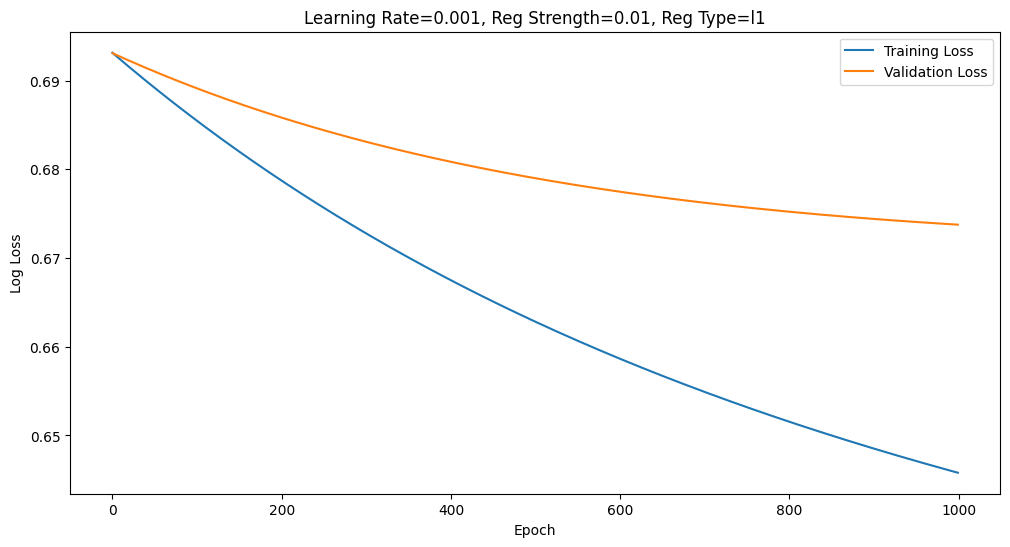

Running with learning_rate=0.001, reg_strength=0.01, reg_type=l2


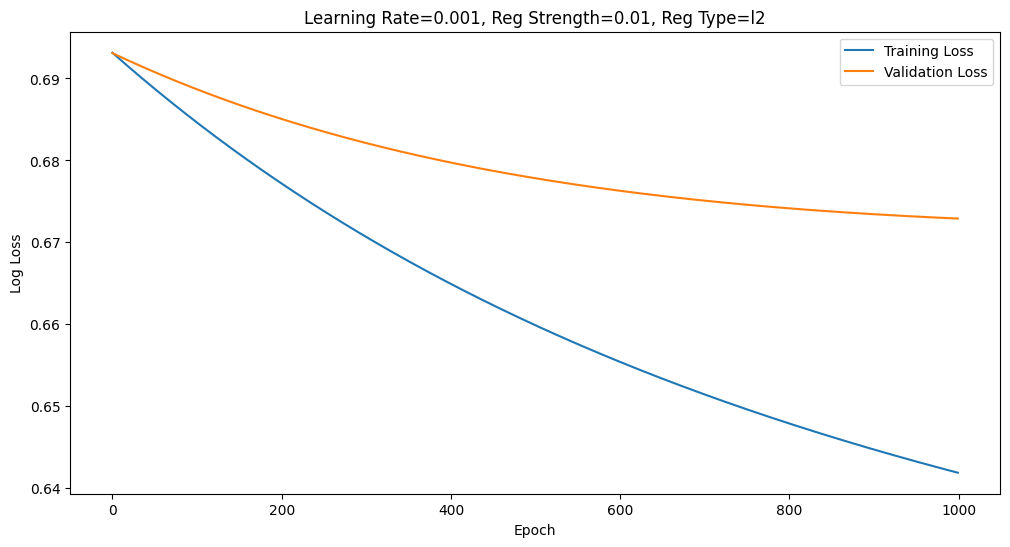

Running with learning_rate=0.001, reg_strength=0.1, reg_type=l1


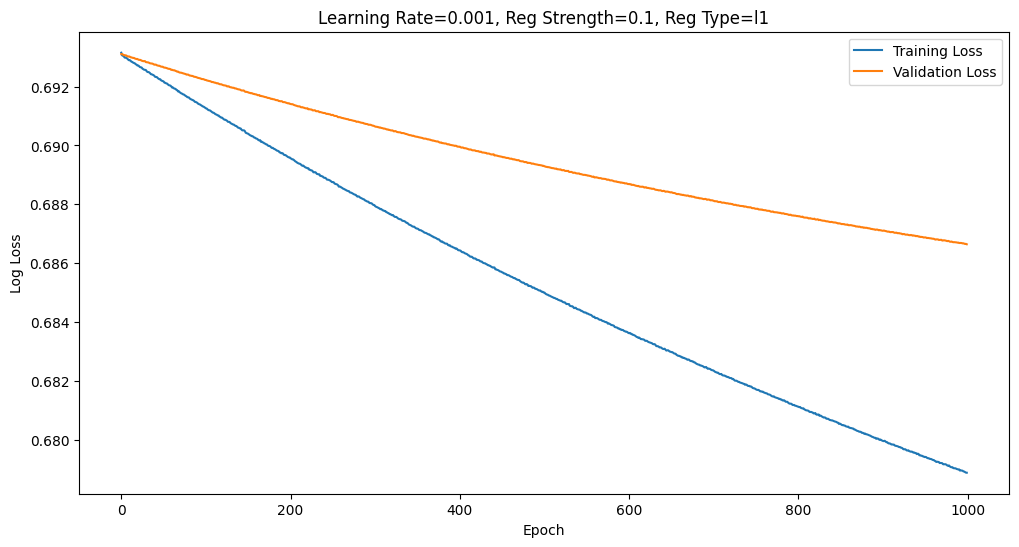

Running with learning_rate=0.001, reg_strength=0.1, reg_type=l2


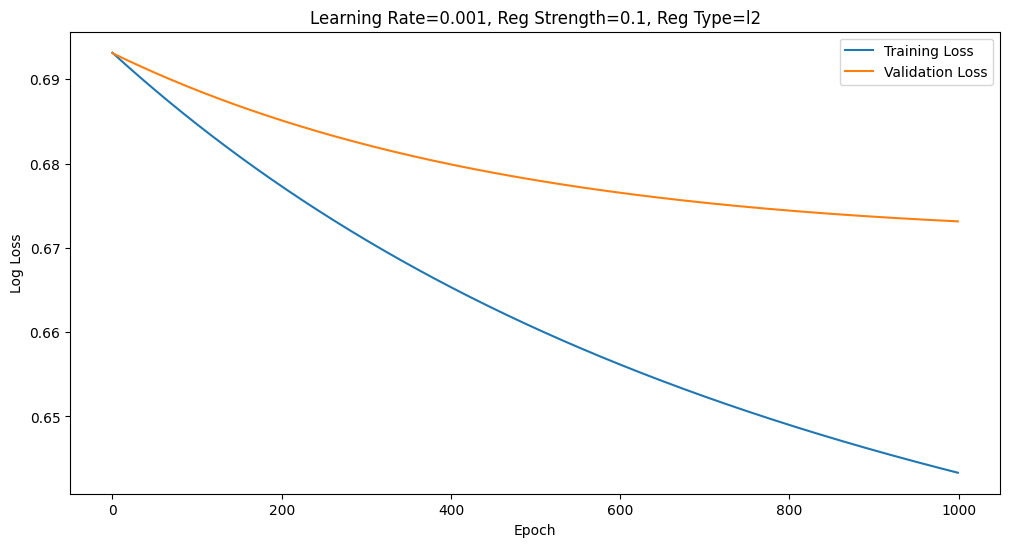

Running with learning_rate=0.001, reg_strength=1, reg_type=l1
Early stopping at epoch 159


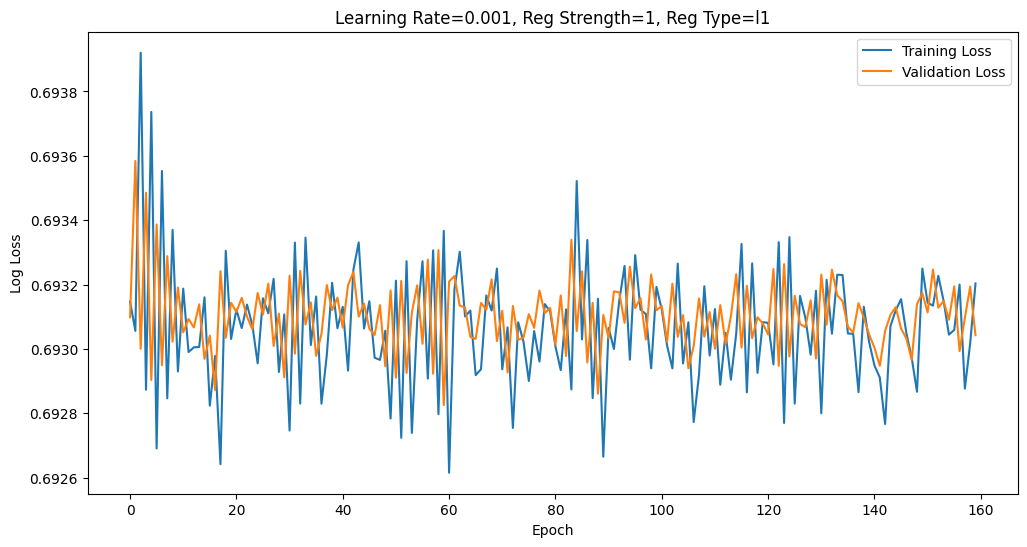

Running with learning_rate=0.001, reg_strength=1, reg_type=l2


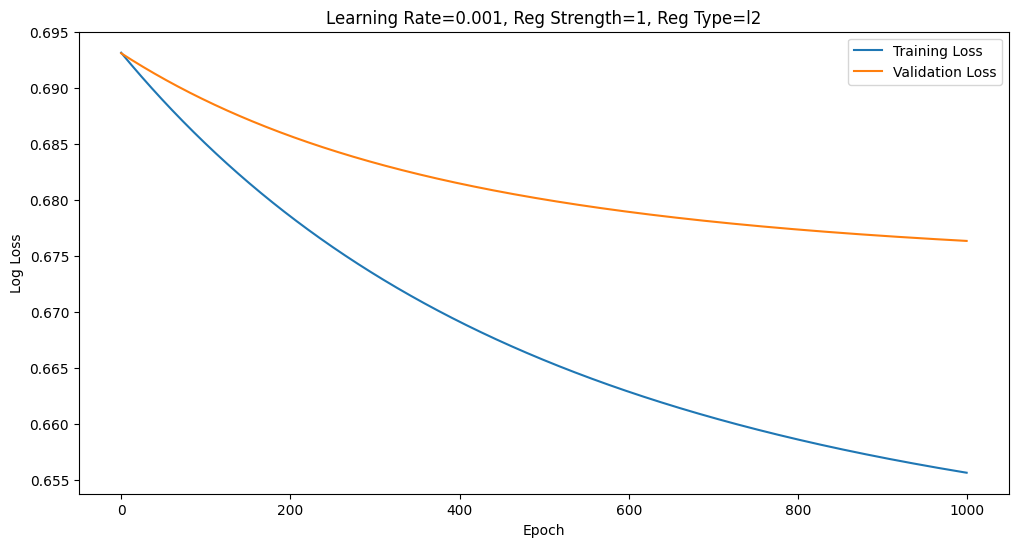

Running with learning_rate=0.01, reg_strength=0.01, reg_type=l1
Early stopping at epoch 273


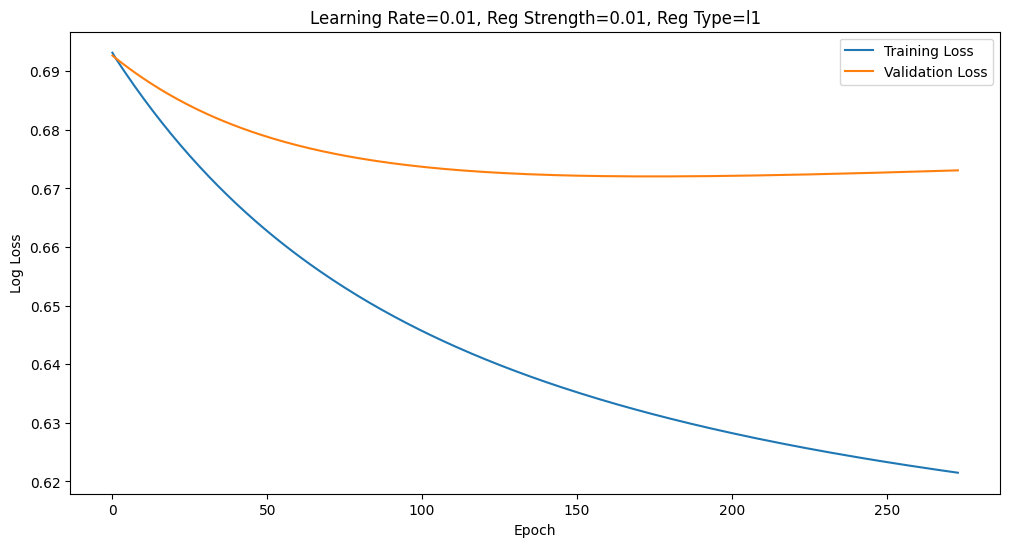

Running with learning_rate=0.01, reg_strength=0.01, reg_type=l2
Early stopping at epoch 241


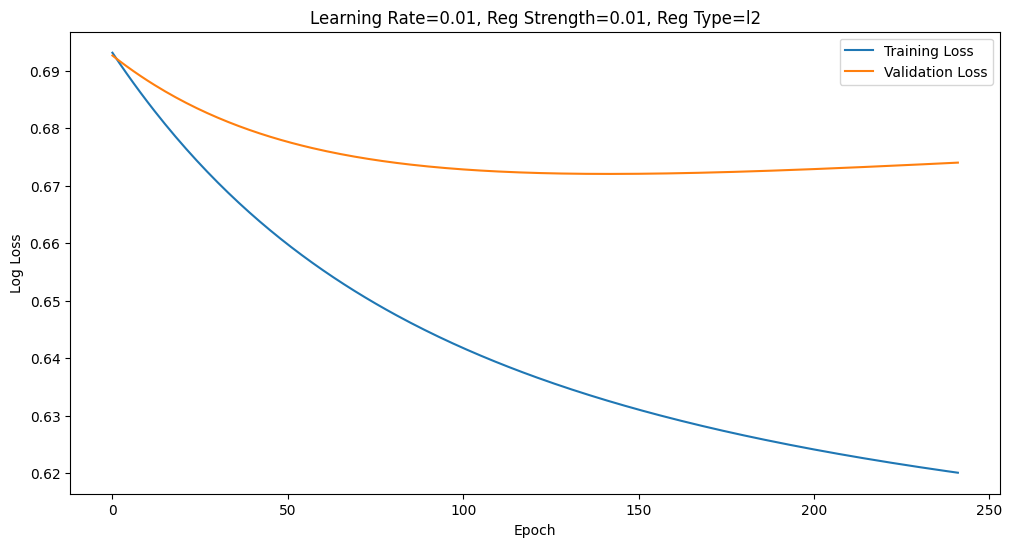

Running with learning_rate=0.01, reg_strength=0.1, reg_type=l1
Early stopping at epoch 909


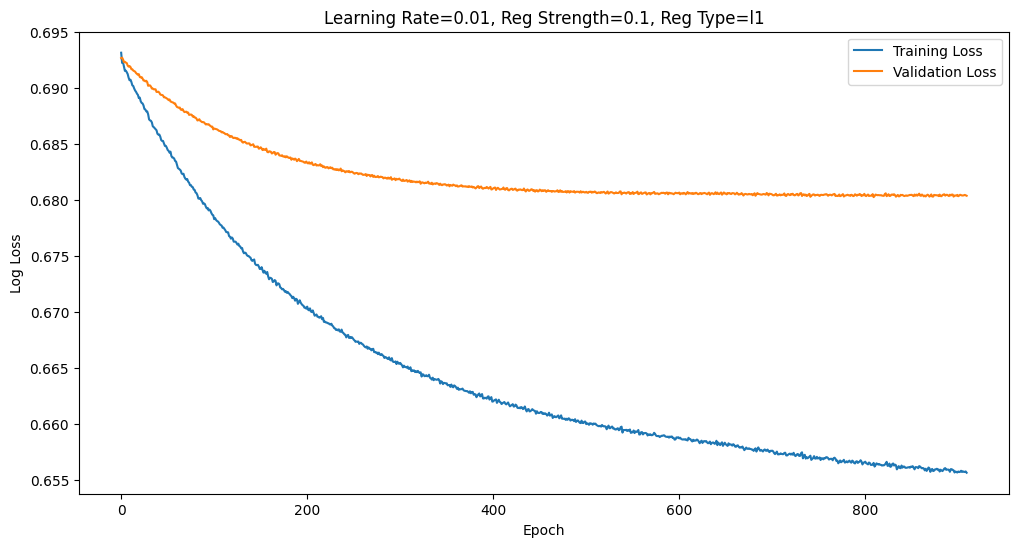

Running with learning_rate=0.01, reg_strength=0.1, reg_type=l2
Early stopping at epoch 259


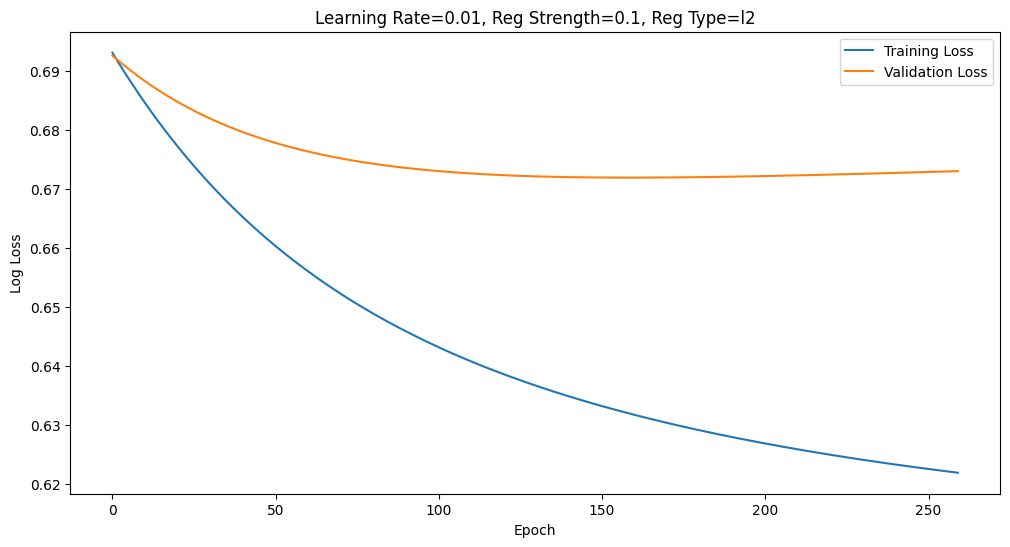

Running with learning_rate=0.01, reg_strength=1, reg_type=l1
Early stopping at epoch 159


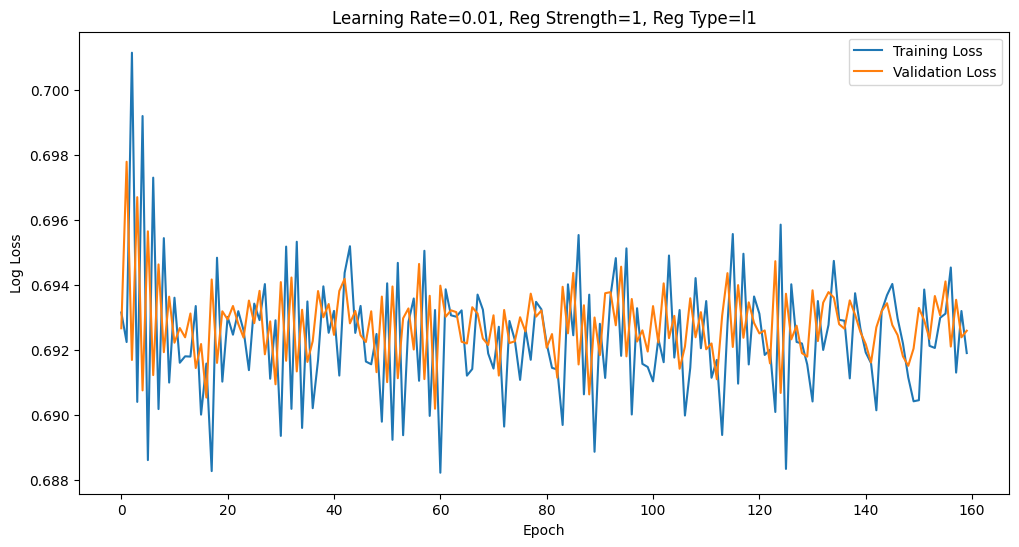

Running with learning_rate=0.01, reg_strength=1, reg_type=l2
Early stopping at epoch 553


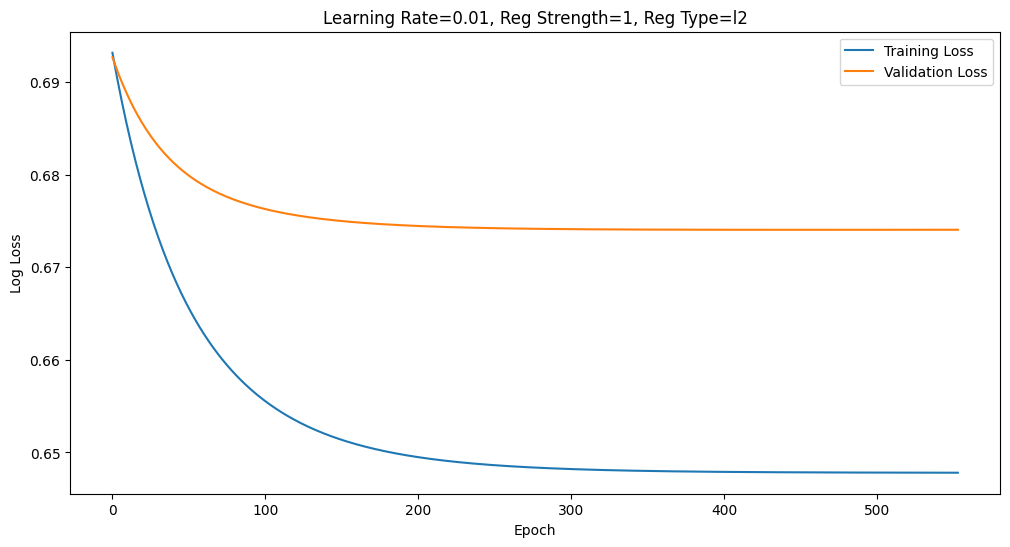

Running with learning_rate=0.1, reg_strength=0.01, reg_type=l1
Early stopping at epoch 116


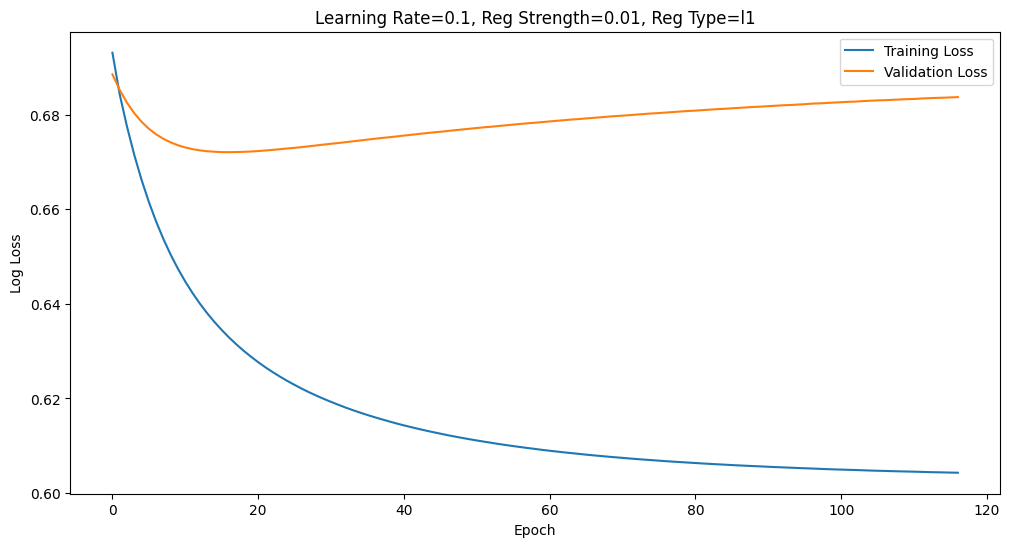

Running with learning_rate=0.1, reg_strength=0.01, reg_type=l2
Early stopping at epoch 113


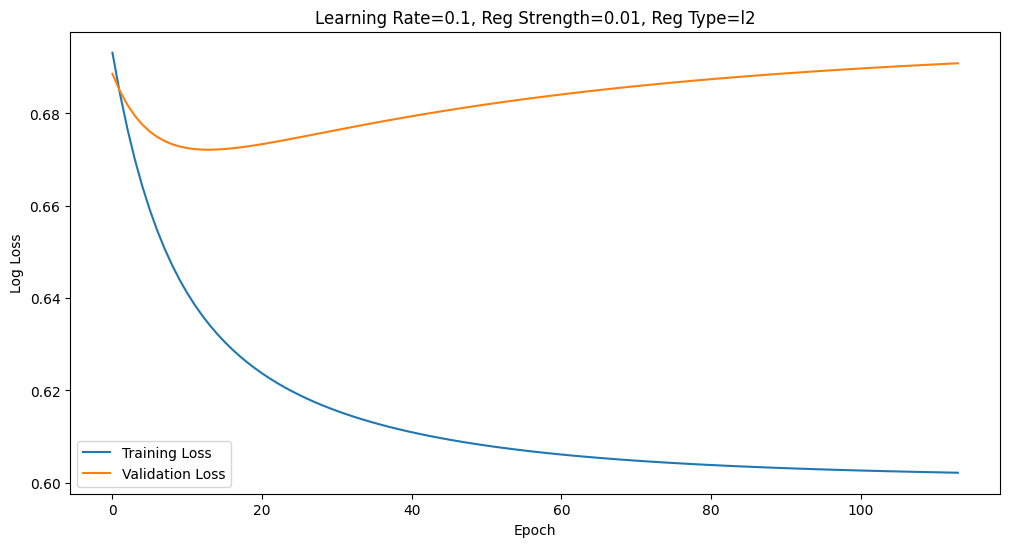

Running with learning_rate=0.1, reg_strength=0.1, reg_type=l1
Early stopping at epoch 191


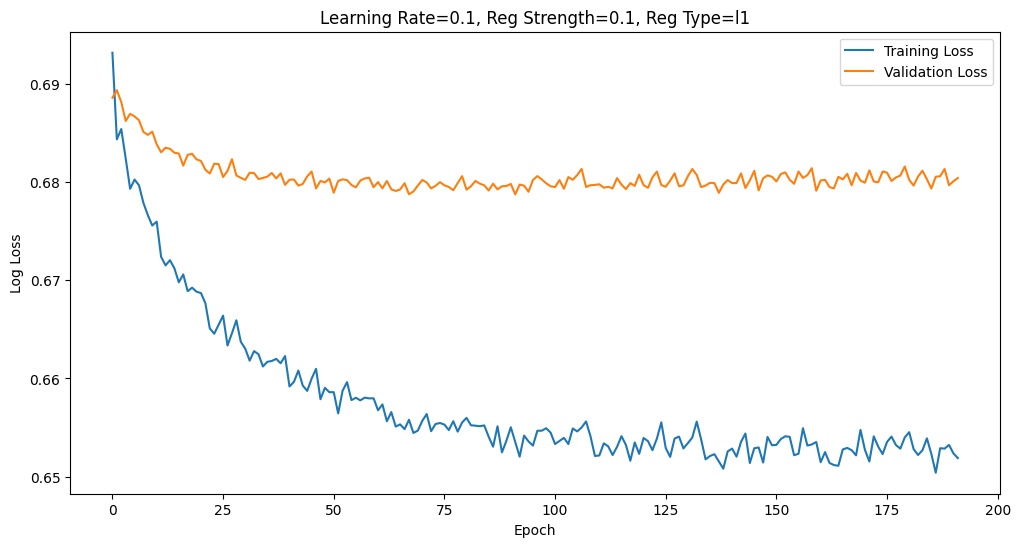

Running with learning_rate=0.1, reg_strength=0.1, reg_type=l2
Early stopping at epoch 114


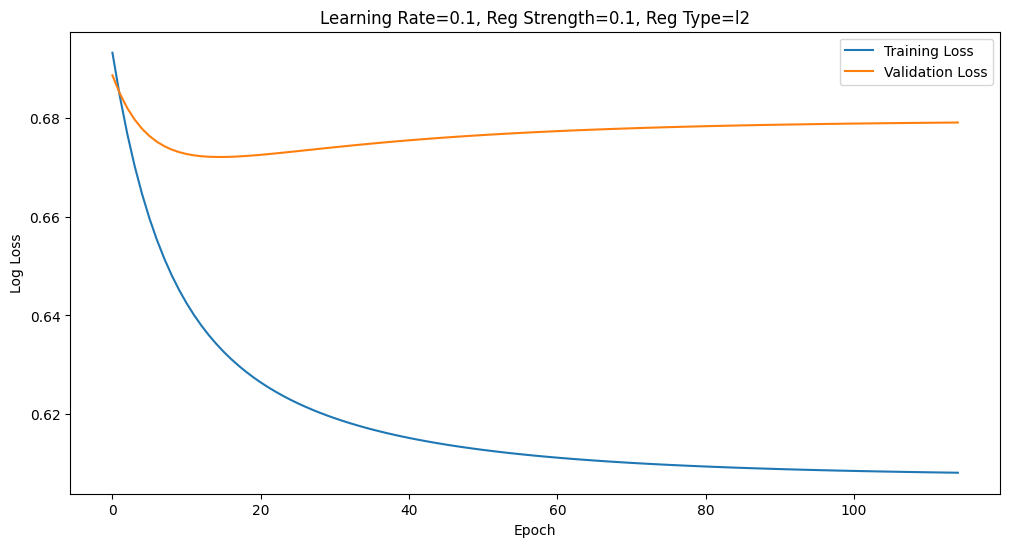

Running with learning_rate=0.1, reg_strength=1, reg_type=l1
Early stopping at epoch 104


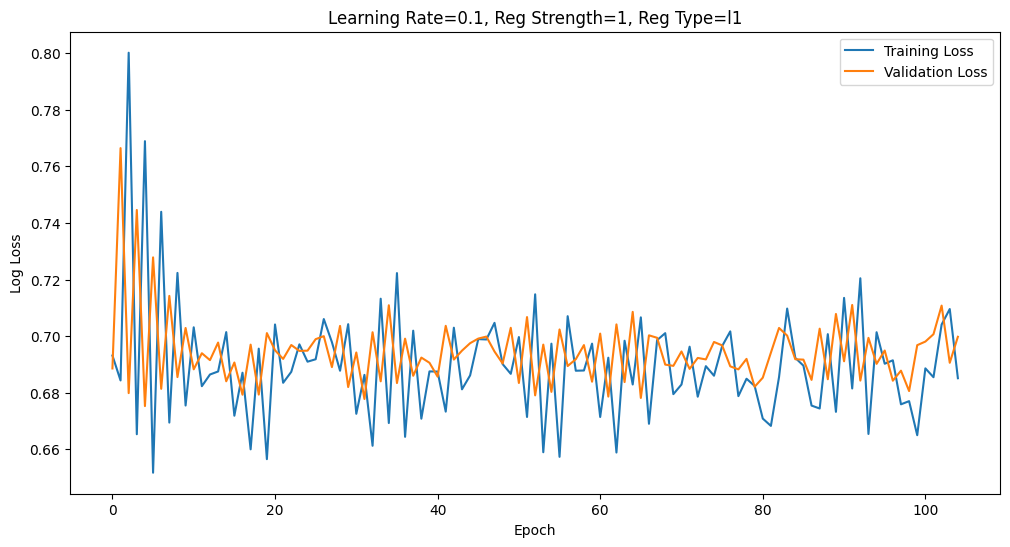

Running with learning_rate=0.1, reg_strength=1, reg_type=l2
Early stopping at epoch 142


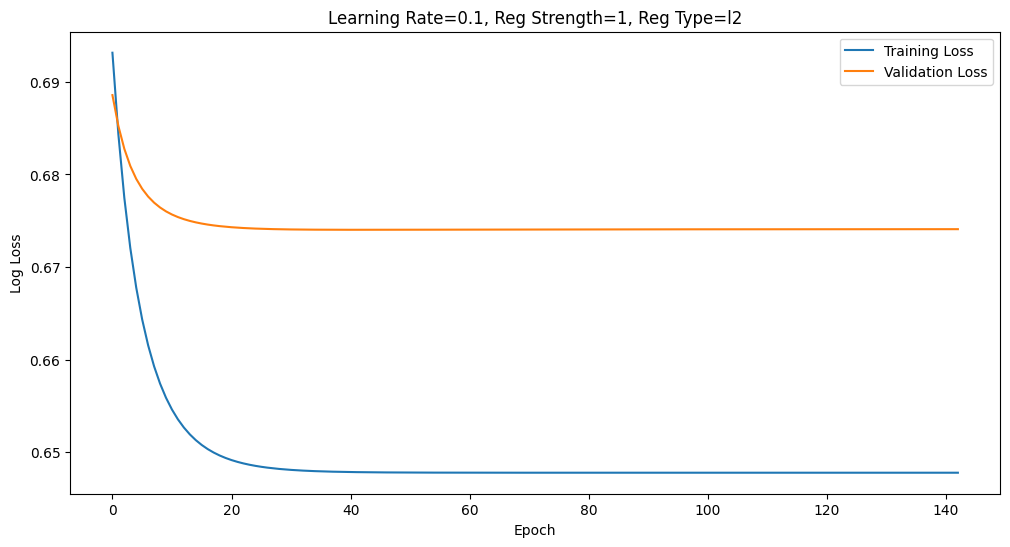

In [48]:

def gradient_descent_with_early_stopping(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=1000, patience=10, reg_strength=0.1, reg_type='l2'):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0
    best_weights = None
    best_bias = None
    min_val_loss = float('inf')
    no_improve_count = 0
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Compute predictions
        linear_model = np.dot(X_train, weights) + bias
        y_pred = 1 / (1 + np.exp(-linear_model))
        
        # Compute loss
        train_loss = log_loss(y_train, y_pred)
        train_losses.append(train_loss)

        # Compute gradients
        errors = y_pred - y_train
        gradient_weights = np.dot(X_train.T, errors) / n_samples
        gradient_bias = np.sum(errors) / n_samples
        
        # Regularization
        if reg_type == 'l1':
            gradient_weights += reg_strength * np.sign(weights)
        elif reg_type == 'l2':
            gradient_weights += reg_strength * weights
        
        # Update weights and bias
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Validation loss
        val_predictions = 1 / (1 + np.exp(- (np.dot(X_val, weights) + bias)))
        val_loss = log_loss(y_val, val_predictions)
        val_losses.append(val_loss)

        # Early stopping check
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            best_weights = weights
            best_bias = bias
            no_improve_count = 0
        else:
            no_improve_count += 1
        
        if no_improve_count >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

    return best_weights, best_bias, train_losses, val_losses

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

learning_rates = [0.001, 0.01, 0.1]
reg_strengths = [0.01, 0.1, 1]
reg_types = ['l1', 'l2']

for lr in learning_rates:
    for reg_strength in reg_strengths:
        for reg_type in reg_types:
            print(f"Running with learning_rate={lr}, reg_strength={reg_strength}, reg_type={reg_type}")
            weights, bias, train_losses, val_losses = gradient_descent_with_early_stopping(
                X_train_scaled, y_train, X_val_scaled, y_val,
                learning_rate=lr, epochs=1000, patience=100, reg_strength=reg_strength, reg_type=reg_type
            )

            plt.figure(figsize=(12, 6))
            plt.plot(train_losses, label='Training Loss')
            plt.plot(val_losses, label='Validation Loss')
            plt.title(f"Learning Rate={lr}, Reg Strength={reg_strength}, Reg Type={reg_type}")
            plt.xlabel('Epoch')
            plt.ylabel('Log Loss')
            plt.legend()
            plt.show()
